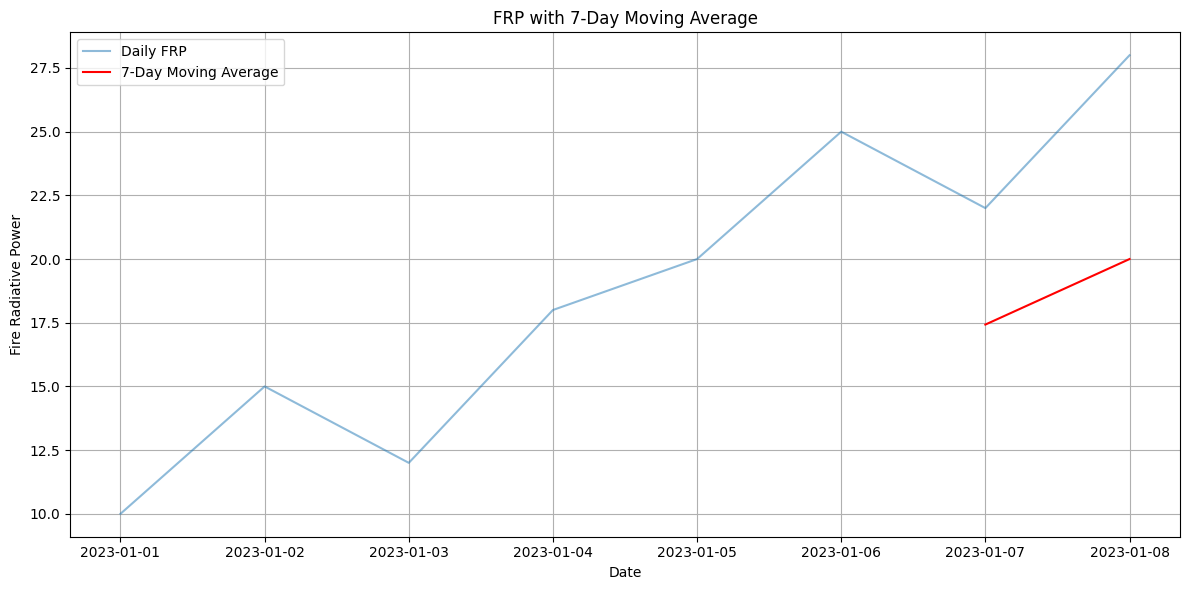

In [3]:
df['FRP_MA_7'] = df['frp'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['acq_date'], df['frp'], label='Daily FRP', alpha=0.5)
plt.plot(df['acq_date'], df['FRP_MA_7'], label='7-Day Moving Average', color='red')
plt.title('FRP with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Fire Radiative Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


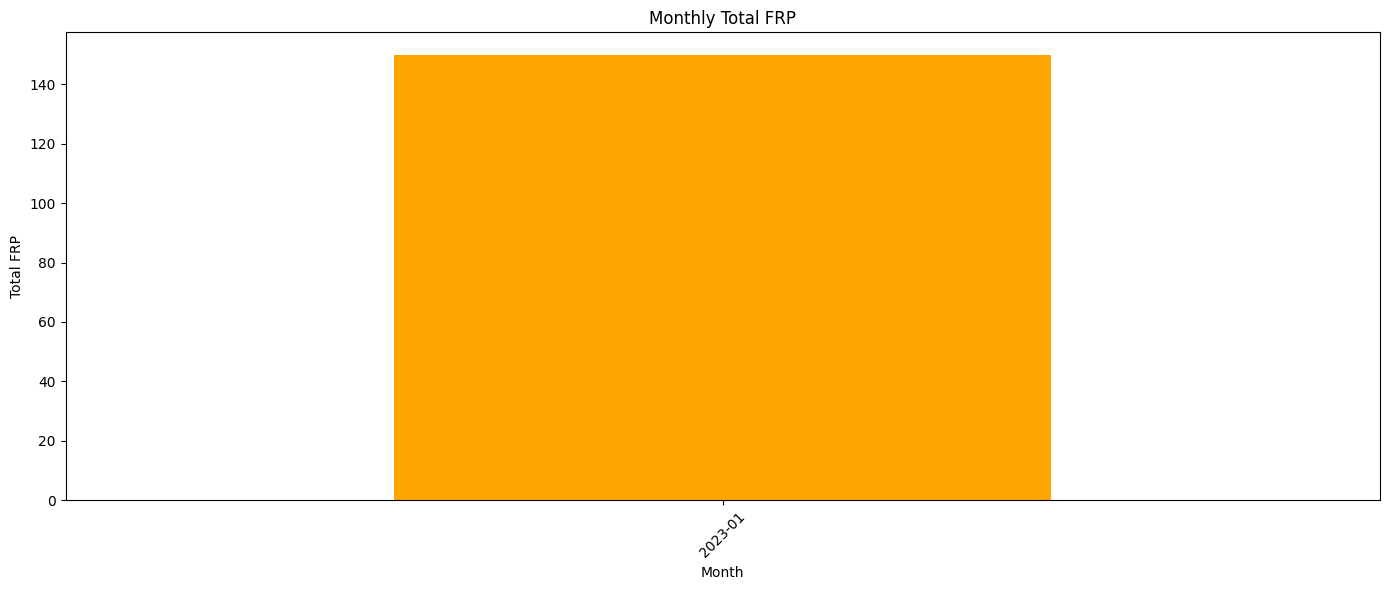

In [4]:
df['Month'] = pd.to_datetime(df['acq_date']).dt.to_period('M')
monthly_frp = df.groupby('Month')['frp'].sum()

monthly_frp.plot(kind='bar', figsize=(14, 6), color='orange')
plt.title('Monthly Total FRP')
plt.xlabel('Month')
plt.ylabel('Total FRP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


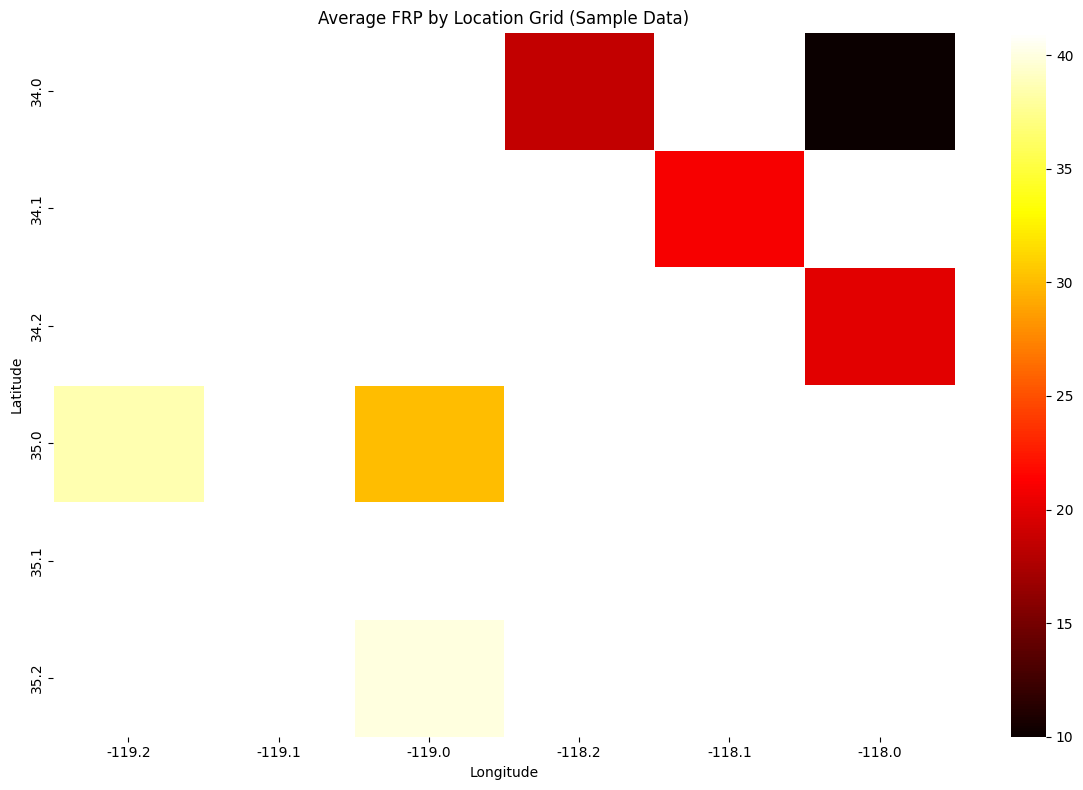

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample DataFrame with latitude and longitude
data = {'acq_date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                                    '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08']),
        'frp': [10, 15, 12, 18, 20, 25, 22, 28, 30, 35, 32, 38, 40, 45, 42, 48],
        'latitude': [34.0, 34.1, 34.0, 34.2, 34.1, 34.0, 34.2, 34.1, 35.0, 35.1, 35.0, 35.2, 35.1, 35.0, 35.2, 35.1],
        'longitude': [-118.0, -118.1, -118.2, -118.0, -118.1, -118.2, -118.0, -118.1, -119.0, -119.1, -119.2, -119.0, -119.1, -119.2, -119.0, -119.1]}
sample_df = pd.DataFrame(data)

# Round lat/lon for grouping into a grid
sample_df['lat_grid'] = sample_df['latitude'].round(1)
sample_df['lon_grid'] = sample_df['longitude'].round(1)

heatmap_data = sample_df.groupby(['lat_grid', 'lon_grid'])['frp'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='hot', linewidths=0.5)
plt.title('Average FRP by Location Grid (Sample Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [16]:
df.to_csv('updated_frp_data.csv', index=False)
